In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('pivothours.csv')

In [9]:
# i only pivoted the hours from 6 am to 9 pm cuz no high demand of 
# rebalancing between 9 pm to 6 am but i might be wrong... oh well we'll see
df

,dock_id,dock_name,tot_docks,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21
0,72,W 52 St & 11 Ave,55,0.315648,0.326555,0.270828,0.214601,0.210432,0.229639,0.208081,0.216462,0.218717,0.204416,0.242766,0.219462,0.214205,0.210101,0.230221,0.241791
1,79,Franklin St & W Broadway,35,0.228571,0.285714,0.400000,0.485714,0.628571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82,St James Pl & Pearl St,28,0.442857,0.456349,0.415966,0.315789,0.303571,0.383929,0.372024,0.315476,0.467532,0.406593,0.404762,0.413690,0.357143,0.342262,0.389610,0.395833
3,83,Atlantic Ave & Fort Greene Pl,62,0.373875,0.388223,0.400696,0.414055,0.423419,0.423072,0.426279,0.430698,0.429204,0.435559,0.431943,0.436743,0.436285,0.440306,0.448174,0.442505
4,116,W 17 St & 8 Ave,39,0.307329,0.309764,0.317484,0.366218,0.410937,0.425752,0.439459,0.436645,0.421524,0.381308,0.346123,0.283489,0.240743,0.256787,0.269961,0.301244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,3536,W 116 St & Broadway,43,0.035659,0.064599,0.080399,0.109738,0.098661,0.100129,0.089252,0.081395,0.081395,0.067031,0.064834,0.056772,0.046512,0.043854,0.046512,0.026676
799,3537,Carlton Ave & Dean St,29,0.586207,0.534483,0.525862,0.448276,0.517241,0.440613,0.487069,0.498433,0.512931,0.407524,0.459770,0.458621,0.538793,0.508621,0.616858,0.508621
800,3538,W 110 St & Amsterdam Ave,45,NaN,NaN,NaN,NaN,NaN,0.266667,0.266667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,3629,Adam Clayton Powell Blvd & W 126 St,33,NaN,NaN,NaN,NaN,NaN,0.515152,0.560606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# rename the columns to get rid of the underscores in front of the numbers
old = df.columns.tolist()[3:]
new = list(range(6, 22))
df = df.rename(columns = dict(zip(old, new)))
df

,dock_id,dock_name,tot_docks,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,72,W 52 St & 11 Ave,55,0.315648,0.326555,0.270828,0.214601,0.210432,0.229639,0.208081,0.216462,0.218717,0.204416,0.242766,0.219462,0.214205,0.210101,0.230221,0.241791
1,79,Franklin St & W Broadway,35,0.228571,0.285714,0.400000,0.485714,0.628571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82,St James Pl & Pearl St,28,0.442857,0.456349,0.415966,0.315789,0.303571,0.383929,0.372024,0.315476,0.467532,0.406593,0.404762,0.413690,0.357143,0.342262,0.389610,0.395833
3,83,Atlantic Ave & Fort Greene Pl,62,0.373875,0.388223,0.400696,0.414055,0.423419,0.423072,0.426279,0.430698,0.429204,0.435559,0.431943,0.436743,0.436285,0.440306,0.448174,0.442505
4,116,W 17 St & 8 Ave,39,0.307329,0.309764,0.317484,0.366218,0.410937,0.425752,0.439459,0.436645,0.421524,0.381308,0.346123,0.283489,0.240743,0.256787,0.269961,0.301244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,3536,W 116 St & Broadway,43,0.035659,0.064599,0.080399,0.109738,0.098661,0.100129,0.089252,0.081395,0.081395,0.067031,0.064834,0.056772,0.046512,0.043854,0.046512,0.026676
799,3537,Carlton Ave & Dean St,29,0.586207,0.534483,0.525862,0.448276,0.517241,0.440613,0.487069,0.498433,0.512931,0.407524,0.459770,0.458621,0.538793,0.508621,0.616858,0.508621
800,3538,W 110 St & Amsterdam Ave,45,NaN,NaN,NaN,NaN,NaN,0.266667,0.266667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,3629,Adam Clayton Powell Blvd & W 126 St,33,NaN,NaN,NaN,NaN,NaN,0.515152,0.560606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
sub = df[~df.isna().any(axis = 1)]

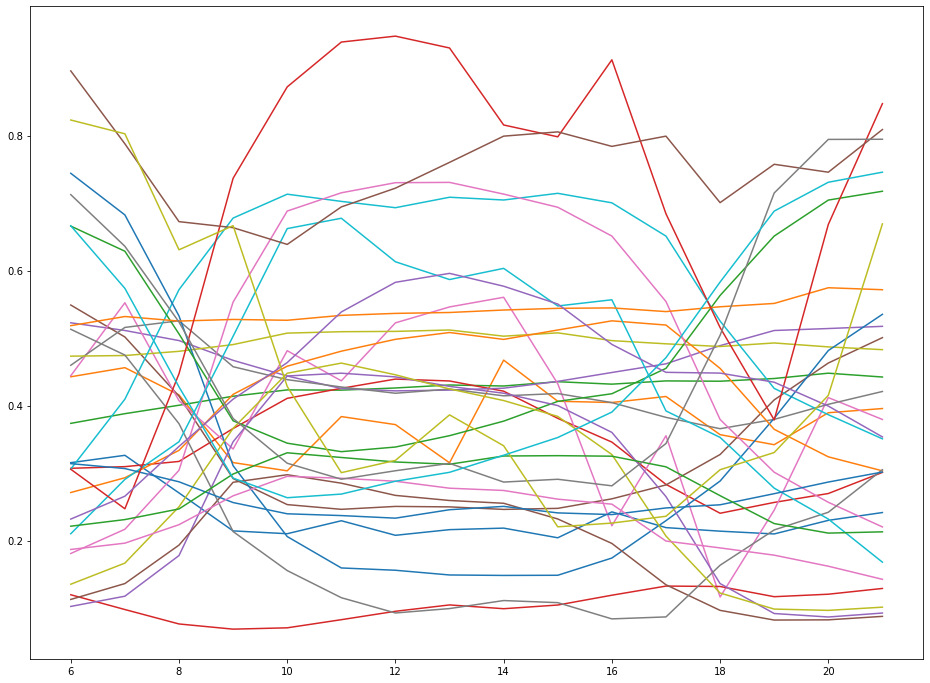

In [25]:
for _ in range(30):   
    row = sub.iloc[_][3:]
    row.plot(figsize = (16, 12))